<a href="https://colab.research.google.com/github/esha21101/AICD_Project/blob/main/Gold_Price_Prediction_using_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Dependencies

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install seaborn

In [5]:
pip install scikit-learn

In [6]:
!pip install matplotlib

# Importing the Libraries

In [7]:
# will hide errors like outdated verisions
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [9]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('Data.csv')

In [10]:
df = data.copy() # creating a copy for further use

In [11]:
# print first 5 rows in the dataframe
data.head()

,Frequency,S12,el1,h1,l1,m2,px,py
0,1.000,-42.088073,6,0.8,6,2,30,30
1,1.009,-42.496948,6,0.8,6,2,30,30
2,1.018,-42.873036,6,0.8,6,2,30,30
3,1.027,-43.132955,6,0.8,6,2,30,30
4,1.036,-43.179753,6,0.8,6,2,30,30


In [12]:
# print last 5 rows of the dataframe
data.tail()

,Frequency,S12,el1,h1,l1,m2,px,py
35034,10.000,-38.505039,4,0.8,4,2,29,30
35035,1.000,-56.209795,4,0.8,4,2,30,25
35036,1.009,-51.813445,4,0.8,4,2,30,25
35037,1.018,-48.740681,4,0.8,4,2,30,25
35038,1.027,-46.388095,4,0.8,4,2,30,25


In [13]:
# number of rows and columns
data.shape

(35039, 8)

In [14]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35039 entries, 0 to 35038
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Frequency  35039 non-null  float64
 1   S12        35039 non-null  float64
 2   el1        35039 non-null  int64  
 3   h1         35039 non-null  float64
 4   l1         35039 non-null  int64  
 5   m2         35039 non-null  int64  
 6   px         35039 non-null  int64  
 7   py         35039 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.1 MB


In [15]:
# checking the number of missing values in Gold Data
data.isnull().sum()

Frequency    0
S12          0
el1          0
h1           0
l1           0
m2           0
px           0
py           0
dtype: int64

In [16]:
data.duplicated().sum() # checking the duplicate values in Gold Data


0

In [17]:
# getting the statistical measures of the Gold data
data.describe()

,Frequency,S12,el1,h1,l1,m2,px,py
count,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000
mean,5.499488,-36.702760,4.514227,0.828568,4.514227,2.228545,27.428865,27.856817
std,2.601003,5.929683,1.295474,0.152256,1.295474,0.636293,1.678344,1.807196
min,1.000000,-92.585815,4.000000,0.600000,4.000000,2.000000,25.000000,25.000000
25%,3.250000,-38.838526,4.000000,0.800000,4.000000,2.000000,26.000000,26.000000
50%,5.500000,-35.750311,4.000000,0.800000,4.000000,2.000000,27.000000,28.000000
75%,7.750000,-32.569943,4.000000,0.800000,4.000000,2.000000,29.000000,30.000000
max,10.000000,-20.051695,8.000000,1.600000,8.000000,4.000000,30.000000,30.000000


Correlation:
1. Positive Correlation -> Rising values in one variable align with increasing values in another
2. Negative Correlation -> Rising values in one variable align with decreasing values in another

In [19]:

correlation = data.corr()

<Axes: >

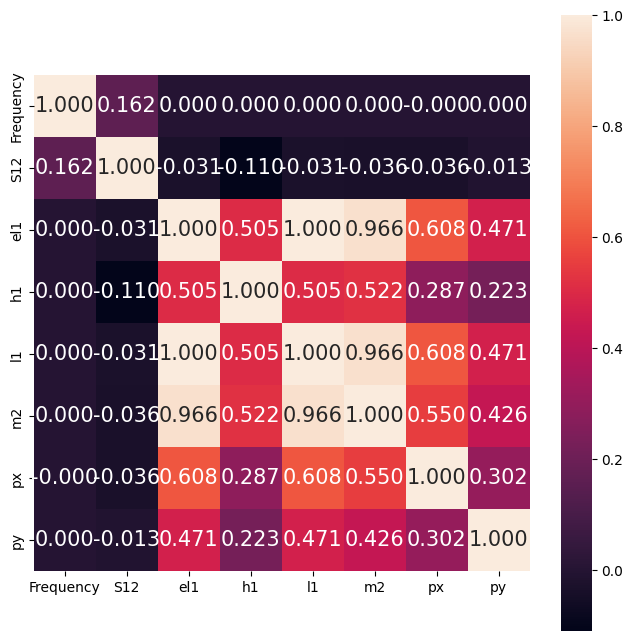

In [20]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f',annot=True, annot_kws={'size':15})

In [22]:
# correlation values of GLD
print(correlation['S12'])

Frequency    0.162196
S12          1.000000
el1         -0.031348
h1          -0.110243
l1          -0.031348
m2          -0.035728
px          -0.036316
py          -0.013085
Name: S12, dtype: float64


<Axes: xlabel='S12', ylabel='Density'>

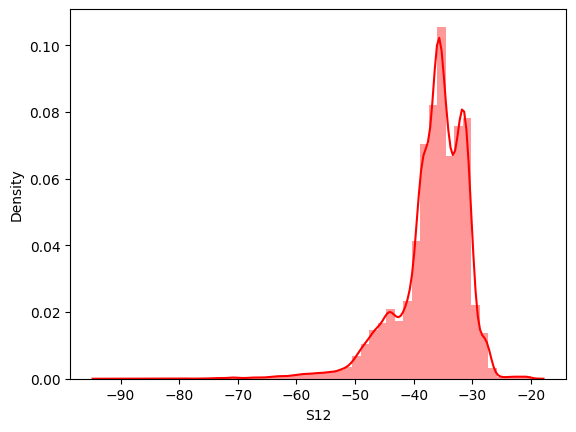

In [26]:
# checking the distribution of the S12 Price
sns.distplot(data['S12'],color='red')

Splitting the Features and Target

In [27]:
# df is copy of data we created above
B = data[["S12"]]
A = data[["Frequency","el1","l1","h1","m2","px","py"]]

In [28]:
print(A)

       Frequency  el1  l1   h1  m2  px  py
0          1.000    6   6  0.8   2  30  30
1          1.009    6   6  0.8   2  30  30
2          1.018    6   6  0.8   2  30  30
3          1.027    6   6  0.8   2  30  30
4          1.036    6   6  0.8   2  30  30
...          ...  ...  ..  ...  ..  ..  ..
35034     10.000    4   4  0.8   2  29  30
35035      1.000    4   4  0.8   2  30  25
35036      1.009    4   4  0.8   2  30  25
35037      1.018    4   4  0.8   2  30  25
35038      1.027    4   4  0.8   2  30  25

[35039 rows x 7 columns]


In [29]:
print(B)

             S12
0     -42.088073
1     -42.496948
2     -42.873036
3     -43.132955
4     -43.179753
...          ...
35034 -38.505039
35035 -56.209795
35036 -51.813445
35037 -48.740681
35038 -46.388095

[35039 rows x 1 columns]


Splitting into Training data and Test Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

#### (n_estimators) represents number of trees in forest. Usually the higher number of trees better to learn data.

In [31]:
regressor = RandomForestRegressor(n_estimators=500)

In [32]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

Model Evaluation

In [33]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[-32.00840231 -33.85766867 -33.58377916 ... -36.30313378 -30.86766583
 -32.32845943]


In [35]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score * 100)

R squared error :  98.94924286183962


Compare the Actual Values and Predicted Values in a Plot

In [36]:
Y_test = list(Y_test)

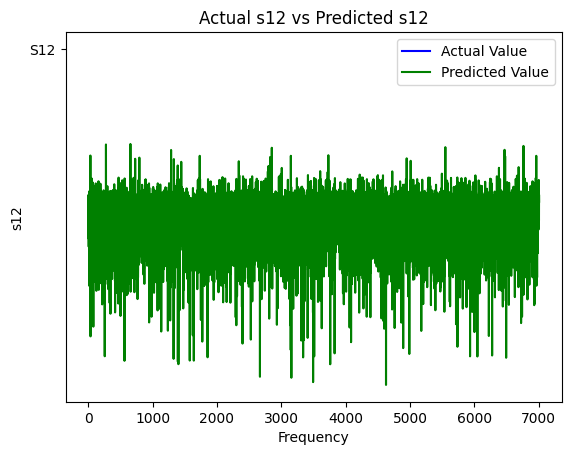

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual s12 vs Predicted s12')
plt.xlabel('Frequency')
plt.ylabel('s12')
plt.legend()
plt.show()